In [510]:
import pandas as pd
import numpy as np
import seaborn as sns

In [511]:
classes = ['OTHER', 'SWEEPING', 'VACUUMING', 'DUSTING', 'RUBBING', 'DOWNSTAIRS', 'WALKING', 'WALKING_FAST', 'UPSTAIRS_FAST', 'UPSTAIRS']

In [512]:
patientNr = 8

In [513]:
X = pd.read_csv('data/ankle/X_0' + str(patientNr) + '.csv').join(pd.read_csv('data/hip/X_0' + str(patientNr) + '.csv'), rsuffix='_hip')
Y = pd.read_csv('data/ankle/Y_0' + str(patientNr) + '.csv')
XY = X.merge(Y, left_index=True, right_index=True)
XY['Timestamp'] = pd.to_datetime(XY['Timestamp'])
XY.set_index('Timestamp', inplace=True)

In [514]:
X

,Timestamp,Accelerometer X,Accelerometer Y,Accelerometer Z,Temperature,Gyroscope X,Gyroscope Y,Gyroscope Z,Magnetometer X,Magnetometer Y,...,Accelerometer X_hip,Accelerometer Y_hip,Accelerometer Z_hip,Temperature_hip,Gyroscope X_hip,Gyroscope Y_hip,Gyroscope Z_hip,Magnetometer X_hip,Magnetometer Y_hip,Magnetometer Z_hip
0,2020-07-31T15:14:50.0000000,-0.022461,-0.993652,-0.340820,33.004673,-2.075195,4.028321,-8.483887,13.037109,53.759763,...,-0.564941,-0.852539,0.025391,33.034624,-0.244141,-1.403809,-0.122070,19.921874,40.429686,-2.050781
1,2020-07-31T15:14:50.0100000,-0.008789,-0.986816,-0.333008,33.004673,-0.610352,3.356934,-9.582520,13.037109,53.759763,...,-0.578613,-0.861816,0.021973,33.022644,-1.098633,-2.441406,-0.915527,19.921874,40.429686,-2.050781
2,2020-07-31T15:14:50.0200000,-0.024414,-1.018555,-0.318359,33.001677,0.488281,3.234863,-10.131837,13.037109,53.759763,...,-0.585449,-0.855957,0.026367,33.016653,-0.305176,-2.929688,-2.014160,19.921874,40.429686,-2.050781
3,2020-07-31T15:14:50.0300000,-0.021973,-1.003418,-0.325684,33.001677,4.516602,1.403809,-11.596680,13.037109,53.759763,...,-0.586426,-0.852539,0.030273,33.007668,0.488281,-3.784180,-3.051758,19.921874,40.429686,-2.050781
4,2020-07-31T15:14:50.0400000,-0.021973,-0.997559,-0.340820,32.998682,6.103516,0.183105,-12.695313,13.916015,55.224607,...,-0.583008,-0.849609,0.023438,33.022644,0.854492,-5.371094,-4.150391,19.921874,40.429686,-2.050781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294995,2020-07-31T16:03:59.9500000,-0.132324,-0.164063,-0.138184,34.355498,-72.631840,-6.835938,125.732430,1.171875,1.757812,...,0.128906,-0.804688,0.163574,35.289993,-30.578615,6.103516,1.953125,35.156248,-9.960937,-33.691405
294996,2020-07-31T16:03:59.9600000,-0.181641,-0.118164,-0.136719,34.355498,-69.824223,2.502442,133.667000,1.171875,1.757812,...,0.127441,-0.859863,0.166992,35.284003,-32.714846,3.112793,3.356934,35.156248,-9.960937,-33.691405
294997,2020-07-31T16:03:59.9700000,-0.190918,-0.079590,-0.109863,34.349507,-66.833500,8.178711,142.639169,1.171875,1.757812,...,0.139160,-0.893555,0.172363,35.301974,-31.860354,2.746582,4.455567,35.156248,-9.960937,-33.691405
294998,2020-07-31T16:03:59.9800000,-0.197266,0.004395,-0.113770,34.343517,-66.040043,14.282227,150.024423,1.171875,1.757812,...,0.155273,-0.905762,0.140137,35.292989,-29.602053,2.014160,4.760742,35.156248,-9.960937,-33.691405


In [515]:
XY = XY.drop(columns = ['Temperature', 'Magnetometer X', 'Magnetometer Y', 'Magnetometer Z', 'Timestamp_hip', 'Temperature_hip', 'Magnetometer X_hip', 'Magnetometer Y_hip', 'Magnetometer Z_hip'])

In [516]:
XY_processed = XY.drop(columns = ['label']).rolling('10s').agg([np.mean, np.var, np.amin, np.amax])
#XY_processed = XY.drop(columns = ['label', 'cum_sum']).rolling('10s').agg([np.mean, np.var, np.amin, np.amax, perc10, perc25, perc75, perc90])

In [517]:
XY_processed

Accelerometer X                                 \
                                   mean       var      amin       amax   
Timestamp                                                                
2020-07-31 15:14:50.000       -0.022461       NaN -0.022461  -0.022461   
2020-07-31 15:14:50.010       -0.015625  0.000093 -0.022461  -0.008789   
2020-07-31 15:14:50.020       -0.018555  0.000072 -0.024414  -0.008789   
2020-07-31 15:14:50.030       -0.019409  0.000051 -0.024414  -0.008789   
2020-07-31 15:14:50.040       -0.019922  0.000040 -0.024414  -0.008789   
...                                 ...       ...       ...        ...   
2020-07-31 16:03:59.950        0.098570  2.328089 -5.042969  15.999512   
2020-07-31 16:03:59.960        0.098628  2.328053 -5.042969  15.999512   
2020-07-31 16:03:59.970        0.098663  2.328031 -5.042969  15.999512   
2020-07-31 16:03:59.980        0.098707  2.328004 -5.042969  15.999512   
2020-07-31 16:03:59.990        0.098826  2.327923 -5.042969  15.999512   

                        Accelerometer Y                                 \
                                   mean       var       amin      amax   
Timestamp                                                                
2020-07-31 15:14:50.000       -0.993652       NaN  -0.993652 -0.993652   
2020-07-31 15:14:50.010       -0.990234  0.000023  -0.993652 -0.986816   
2020-07-31 15:14:50.020       -0.999674  0.000279  -1.018555 -0.986816   
2020-07-31 15:14:50.030       -1.000610  0.000190  -1.018555 -0.986816   
2020-07-31 15:14:50.040       -1.000000  0.000144  -1.018555 -0.986816   
...                                 ...       ...        ...       ...   
2020-07-31 16:03:59.950       -1.010773  2.177140 -16.000000  9.699707   
2020-07-31 16:03:59.960       -1.010745  2.177190 -16.000000  9.699707   
2020-07-31 16:03:59.970       -1.010707  2.177259 -16.000000  9.699707   
2020-07-31 16:03:59.980       -1.010594  2.177476 -16.000000  9.699707   
2020-07-31 16:03:59.990       -1.010479  2.177707 -16.000000  9.699707   

                        Accelerometer Z            ... Gyroscope X_hip  \
                                   mean       var  ...            amin   
Timestamp                                          ...                   
2020-07-31 15:14:50.000       -0.340820       NaN  ...       -0.244141   
2020-07-31 15:14:50.010       -0.336914  0.000031  ...       -1.098633   
2020-07-31 15:14:50.020       -0.330729  0.000130  ...       -1.098633   
2020-07-31 15:14:50.030       -0.329468  0.000093  ...       -1.098633   
2020-07-31 15:14:50.040       -0.331738  0.000096  ...       -1.098633   
...                                 ...       ...  ...             ...   
2020-07-31 16:03:59.950        0.069758  1.844663  ...      -69.458012   
2020-07-31 16:03:59.960        0.069811  1.844638  ...      -69.458012   
2020-07-31 16:03:59.970        0.069900  1.844598  ...      -69.458012   
2020-07-31 16:03:59.980        0.070003  1.844549  ...      -69.458012   
2020-07-31 16:03:59.990        0.070117  1.844492  ...      -69.458012   

                                   Gyroscope Y_hip                          \
                              amax            mean         var        amin   
Timestamp                                                                    
2020-07-31 15:14:50.000  -0.244141       -1.403809         NaN   -1.403809   
2020-07-31 15:14:50.010  -0.244141       -1.922608    0.538304   -2.441406   
2020-07-31 15:14:50.020  -0.244141       -2.258301    0.607222   -2.929688   
2020-07-31 15:14:50.030   0.488281       -2.639771    0.986892   -3.784180   
2020-07-31 15:14:50.040   0.854492       -3.186035    2.232194   -5.371094   
...                            ...             ...         ...         ...   
2020-07-31 16:03:59.950  81.298833        0.170349  860.700019 -101.135260   
2020-07-31 16:03:59.960  81.298833        0.142700  859.771152 -101.135260   
2020-07-31 16:03:59.970  81.298833        0.111694  858

In [518]:
XY_processed = XY_processed.join(XY['label'])
XY_processed = XY_processed.dropna()
XY_processed = XY_processed.iloc[::100,:]

C:\Users\Andreas\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [519]:
XY_processed

,"(Accelerometer X, mean)","(Accelerometer X, var)","(Accelerometer X, amin)","(Accelerometer X, amax)","(Accelerometer Y, mean)","(Accelerometer Y, var)","(Accelerometer Y, amin)","(Accelerometer Y, amax)","(Accelerometer Z, mean)","(Accelerometer Z, var)",...,"(Gyroscope X_hip, amax)","(Gyroscope Y_hip, mean)","(Gyroscope Y_hip, var)","(Gyroscope Y_hip, amin)","(Gyroscope Y_hip, amax)","(Gyroscope Z_hip, mean)","(Gyroscope Z_hip, var)","(Gyroscope Z_hip, amin)","(Gyroscope Z_hip, amax)",label
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-07-31 15:14:50.010,-0.015625,0.000093,-0.022461,-0.008789,-0.990234,0.000023,-0.993652,-0.986816,-0.336914,0.000031,...,-0.244141,-1.922608,0.538304,-2.441406,-1.403809,-0.518799,0.314787,-0.915527,-0.122070,0
2020-07-31 15:14:51.010,-0.021480,0.149314,-0.515625,2.727539,-1.019301,0.141986,-3.803223,0.126465,-0.155580,0.220645,...,7.812500,-2.859078,20.964958,-11.474610,4.638672,-1.223695,9.360171,-7.141114,4.577637,0
2020-07-31 15:14:52.010,-0.036503,0.075261,-0.515625,2.727539,-1.022575,0.071362,-3.803223,0.126465,-0.108454,0.113203,...,7.812500,-1.839811,11.729362,-11.474610,4.638672,-0.891959,5.805298,-7.141114,4.577637,0
2020-07-31 15:14:53.010,-0.041578,0.050316,-0.515625,2.727539,-1.023598,0.047664,-3.803223,0.126465,-0.094450,0.076016,...,7.812500,-1.317050,8.443300,-11.474610,4.638672,-0.627005,4.197378,-7.141114,4.577637,0
2020-07-31 15:14:54.010,-0.044062,0.037787,-0.515625,2.727539,-1.024081,0.035779,-3.803223,0.126465,-0.087774,0.057196,...,7.812500,-1.045450,6.585552,-11.474610,4.638672,-0.355644,3.431224,-7.141114,4.577637,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31 16:03:55.010,0.108219,1.998359,-5.042969,15.999512,-0.991193,1.650583,-16.000000,6.902344,0.047460,1.069849,...,81.298833,0.490695,690.226634,-90.637213,72.082524,0.074016,844.912902,-60.668949,63.354496,17
2020-07-31 16:03:56.010,0.132966,2.275359,-5.042969,15.999512,-0.986229,1.955599,-16.000000,6.902344,0.056261,1.508968,...,81.298833,-2.188260,750.129795,-100.219733,72.082524,-0.885090,821.198180,-60.668949,63.415531,17
2020-07-31 16:03:57.010,0.104291,2.008298,-5.042969,15.999512,-1.009598,1.703787,-16.000000,6.902344,0.050737,1.447907,...,81.298833,-2.339913,804.255883,-100.219733,127.746590,2.186574,839.246840,-57.495121,63.415531,0


In [520]:
XY_processed = XY_processed.reset_index()

In [521]:
XY_processed.columns

Index([                    'Timestamp',     ('Accelerometer X', 'mean'),
            ('Accelerometer X', 'var'),     ('Accelerometer X', 'amin'),
           ('Accelerometer X', 'amax'),     ('Accelerometer Y', 'mean'),
            ('Accelerometer Y', 'var'),     ('Accelerometer Y', 'amin'),
           ('Accelerometer Y', 'amax'),     ('Accelerometer Z', 'mean'),
            ('Accelerometer Z', 'var'),     ('Accelerometer Z', 'amin'),
           ('Accelerometer Z', 'amax'),         ('Gyroscope X', 'mean'),
                ('Gyroscope X', 'var'),         ('Gyroscope X', 'amin'),
               ('Gyroscope X', 'amax'),         ('Gyroscope Y', 'mean'),
                ('Gyroscope Y', 'var'),         ('Gyroscope Y', 'amin'),
               ('Gyroscope Y', 'amax'),         ('Gyroscope Z', 'mean'),
                ('Gyroscope Z', 'var'),         ('Gyroscope Z', 'amin'),
               ('Gyroscope Z', 'amax'), ('Accelerometer X_hip', 'mean'),
        ('Accelerometer X_hip', 'var'), ('Accelerom

In [522]:
#XY_processed = XY_processed[XY_processed['label'] != 0]
X = XY_processed.drop(columns = ['label', 'Timestamp'])
Y = pd.DataFrame(XY_processed['label'])['label']

In [523]:
Y.describe()

count    2950.000000
mean        3.676949
std         5.787322
min         0.000000
25%         0.000000
50%         0.000000
75%         9.000000
max        17.000000
Name: label, dtype: float64

In [524]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [525]:
X_test

,"(Accelerometer X, mean)","(Accelerometer X, var)","(Accelerometer X, amin)","(Accelerometer X, amax)","(Accelerometer Y, mean)","(Accelerometer Y, var)","(Accelerometer Y, amin)","(Accelerometer Y, amax)","(Accelerometer Z, mean)","(Accelerometer Z, var)",...,"(Gyroscope X_hip, amin)","(Gyroscope X_hip, amax)","(Gyroscope Y_hip, mean)","(Gyroscope Y_hip, var)","(Gyroscope Y_hip, amin)","(Gyroscope Y_hip, amax)","(Gyroscope Z_hip, mean)","(Gyroscope Z_hip, var)","(Gyroscope Z_hip, amin)","(Gyroscope Z_hip, amax)"
790,-0.102527,0.000003,-0.107910,-0.096680,-1.020558,0.000004,-1.031738,-1.009277,0.059181,0.000011,...,-0.183105,5.187989,-0.145563,11.927219,-11.779786,10.437012,0.222963,1.293267,-3.906250,3.112793
246,-0.043085,0.000003,-0.049805,-0.035645,-1.025173,0.000002,-1.030762,-1.018555,-0.078116,0.000007,...,0.976563,2.958374,-0.184469,0.066730,-1.037598,1.037598,0.268937,0.143365,-1.159668,1.892090
2510,-0.029980,0.845363,-5.948730,5.210449,-1.272424,0.623572,-5.775879,2.382813,-0.176266,0.364904,...,-110.229499,82.275396,-3.285134,2250.942891,-156.799326,235.290542,-0.593057,831.320535,-62.927250,61.035160
2486,-0.016888,0.980976,-6.791992,4.385254,-1.257144,0.613499,-5.891113,1.594238,-0.193154,0.313581,...,-98.632819,94.116217,0.172180,2677.857454,-169.555674,175.964366,-0.529480,827.816516,-55.175785,66.406254
2836,0.103901,0.852091,-3.233887,8.018555,-1.052128,0.686249,-5.546387,3.926270,0.044054,0.322179,...,-121.643074,131.774910,-1.274174,921.058650,-100.097662,100.830084,0.030377,1108.645163,-84.655767,87.036138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,-0.057066,0.130408,-1.826172,4.623047,-1.034481,0.133501,-4.415527,1.691895,0.035052,0.054499,...,-112.731940,130.004891,3.158884,510.904384,-88.989263,67.749028,0.146768,353.090912,-65.246586,90.576177
1453,-0.066033,0.060171,-1.108887,2.093262,-1.024117,0.053606,-4.681152,0.063477,0.067812,0.064685,...,-42.114260,29.968264,0.435791,877.623991,-83.740239,63.293461,-0.421143,93.866826,-26.855470,39.123538
2635,-0.028785,1.258344,-11.344238,5.397949,-1.347872,0.901308,-6.187012,1.781250,-0.174994,0.500888,...,-122.009285,123.840340,-1.178040,2924.609716,-198.913586,152.587900,-0.609253,1071.366024,-63.110355,77.148442
1057,-0.099863,0.000006,-0.106934,-0.083496,-1.020420,0.000003,-1.028320,-1.009766,0.064629,0.000012,...,0.305176,3.356934,0.214293,6.406121,-5.554200,11.230469,0.309332,1.792284,-3.540039,4.272461


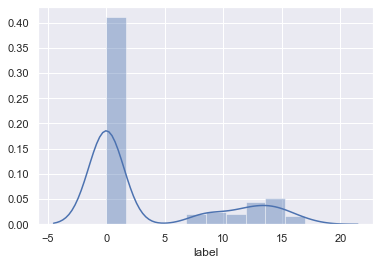

In [526]:
sns.distplot(y_test)

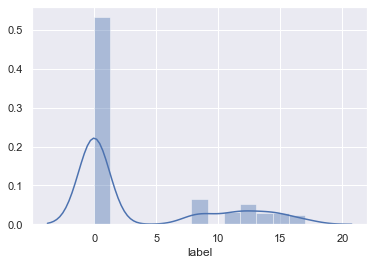

In [527]:
sns.distplot(y_train)

In [528]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
rf = RandomForestClassifier(max_depth=18, random_state=42)
rf.fit(X_train, y_train)

C:\Users\Andreas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=18, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [529]:
rf.score(X_test, y_test)

0.9819209039548022

In [530]:
y_test_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

In [531]:
f1_score(y_test, y_test_pred, average='weighted')

0.9819154171334412

In [532]:
classes

['OTHER',
 'SWEEPING',
 'VACUUMING',
 'DUSTING',
 'RUBBING',
 'DOWNSTAIRS',
 'WALKING',
 'WALKING_FAST',
 'UPSTAIRS_FAST',
 'UPSTAIRS']

In [533]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="mako_r")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

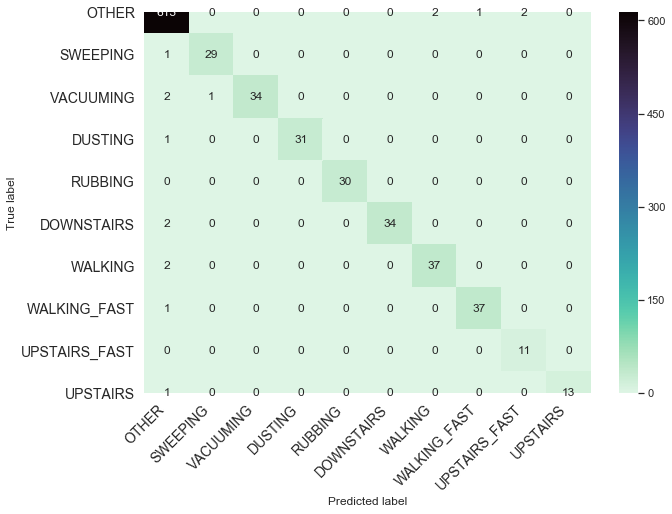

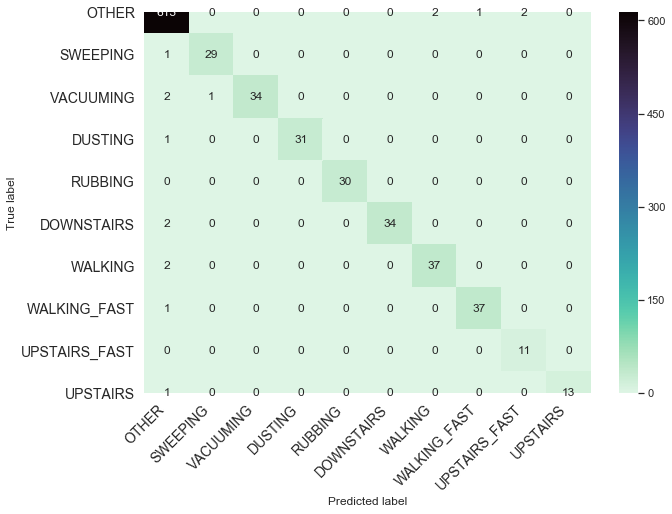

In [534]:
import matplotlib.pyplot as plt
print_confusion_matrix(cm, classes)